In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [137]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

print('Number of training observations:', len(train_data))
train_data.head()

Number of training observations: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
print('Number of testing observations:', len(test_data))
test_data.head()

Number of testing observations: 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA (Exploratory Data Analysis)

## Check for empty/NaN Values

In [139]:
# check for empty values on training set
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 2


In [140]:
# check for empty values on test set
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 1
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


## Fill in Empty Values

In [141]:
# fill in empty values in 'Embarked' column
EMBARKED_MODE = train_data['Embarked'].mode()
train_data['Embarked'] = train_data['Embarked'].fillna(EMBARKED_MODE[0])
# fill in empty values in 'Fare' column
FARE_MEAN = train_data['Fare'].mean()
train_data['Fare'] = train_data['Fare'].fillna(FARE_MEAN)

# check for empty values on training set
print('--After filling in empty values on training data--')
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

--After filling in empty values on training data--
Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 0


In [142]:
# fill in empty values in 'Fare' column
FARE_MEAN = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(FARE_MEAN)

# check for empty values on training set
print('--After filling in empty values on training data--')
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

--After filling in empty values on training data--
Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


In [143]:
# replace 'male' values to 0 and 'female' values to 1
train_data = train_data.replace({'male': 0, 'female': 1})
test_data = test_data.replace({'male': 0, 'female': 1})

In [144]:
# get one-hot encoding for 'Embarked' column
train_embarked = pd.get_dummies(train_data['Embarked'])
for c in train_embarked.columns:
    train_data[c] = train_embarked[c]
    
test_embarked = pd.get_dummies(test_data['Embarked'])
for c in test_embarked.columns:
    test_data[c] = test_embarked[c]

## Survival Rate

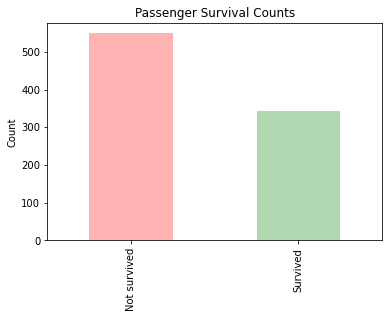

In [145]:
# visualize the number of survived passengers
LABEL = ['Not survived', 'Survived']
df_survived = train_data[['Survived']].value_counts()
df_survived.plot(kind='bar', color=['red', 'green'], alpha=.3)

plt.title('Passenger Survival Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), LABEL)
plt.show()

## Gender

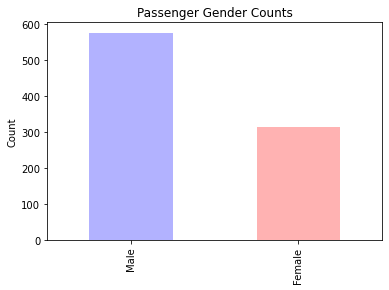

In [146]:
# visualize the count of passenger genders
GENDER = ['Male', 'Female']
df_sex = train_data[['Sex']].value_counts()
df_sex.plot(kind='bar', color=['blue', 'red'], alpha=.3)

plt.title('Passenger Gender Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), GENDER)

plt.show()

In [147]:
# group the passengers who survived by gender
df_survived_gender = train_data[['Survived', 'Sex']].value_counts()
df_survived_gender = pd.pivot_table(df_survived_gender.to_frame(), values=0, index=['Survived', 'Sex'], aggfunc=np.sum)
df_survived_gender = df_survived_gender.reset_index()
df_survived_gender = df_survived_gender.rename(columns={0: 'Counts'})

df_survived_gender

,Survived,Sex,Counts
0,0,0,468
1,0,1,81
2,1,0,109
3,1,1,233


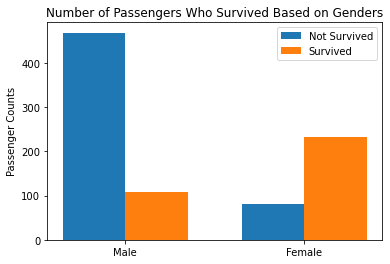

In [148]:
# number of passengers who didn't survive grouped by gender
x = np.arange(len(GENDER))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, df_survived_gender[df_survived_gender['Survived'] == 0]['Counts'], width)
ax.bar(x + width/2, df_survived_gender[df_survived_gender['Survived'] == 1]['Counts'], width)
# plt.xticks(np.arange(2), GENDER)
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Genders')
ax.set_xticks(x)
ax.set_xticklabels(GENDER)
ax.legend(['Not Survived', 'Survived'])

plt.show()

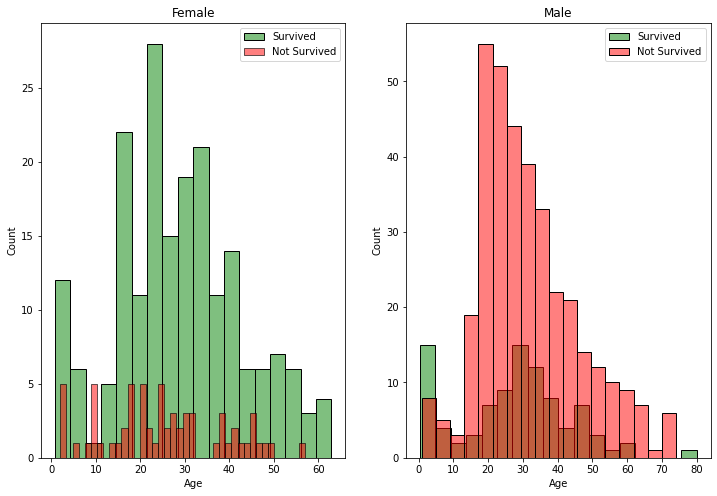

In [149]:
### passengers grouped by gender and age
female = train_data[train_data['Sex'] == 1]
male = train_data[train_data['Sex'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12,8))
ax = sns.histplot(female[female['Survived'] == 1].Age.dropna(), label='Survived', bins=18, kde=False, ax=axes[0], color='green', alpha=0.5)
ax = sns.histplot(female[female['Survived'] == 0].Age.dropna(), label='Not Survived', bins=40, kde=False, ax=axes[0], color='red', alpha=0.5)
axes[0].legend()
axes[0].set_title('Female')

ax = sns.histplot(male[male['Survived'] == 1].Age.dropna(), label='Survived', bins=18, kde=False, ax=axes[1], color='green', alpha=0.5)
ax = sns.histplot(male[male['Survived'] == 0].Age.dropna(), label='Not Survived', bins=18, kde=False, ax=axes[1], color='red', alpha=0.5)
ax.legend()
ax.set_title('Male')

plt.show()

## Ticket Class (PClass)

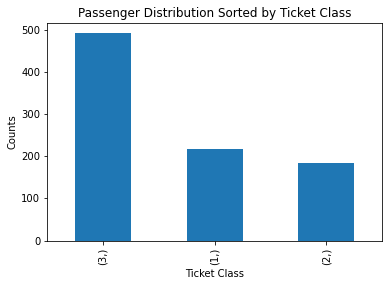

In [150]:
# visualize the count of ticket class
df_pclass = train_data[['Pclass']].value_counts()
df_pclass.plot(kind='bar')

plt.title('Passenger Distribution Sorted by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Counts')

plt.show()

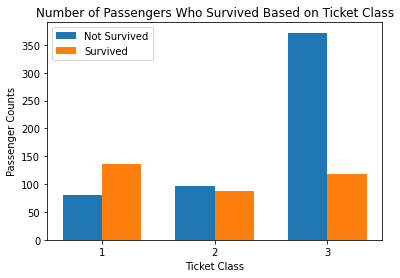

In [151]:
# visualize passengers who survived based on ticket class
TICKET = ['1', '2', '3']
df_survived_pclass = train_data[['Pclass', 'Survived']].value_counts()
df_survived_pclass  = pd.pivot_table(df_survived_pclass.to_frame(), values=0, index=['Survived', 'Pclass'], aggfunc=np.sum)
df_survived_pclass  = df_survived_pclass.reset_index()
df_survived_pclass  = df_survived_pclass.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(TICKET))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Ticket Class')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Ticket Class')
ax.set_xticks(x)
ax.set_xticklabels(TICKET)
ax.legend()

plt.show()
# df_survived_pclass.plot(kind='bar')
# plt.title('Number of Passengers Who Survived Based on Ticket Class')
# plt.ylabel('Passengers Survived')
# plt.xlabel('Ticket Class')

# plt.show()

## Age

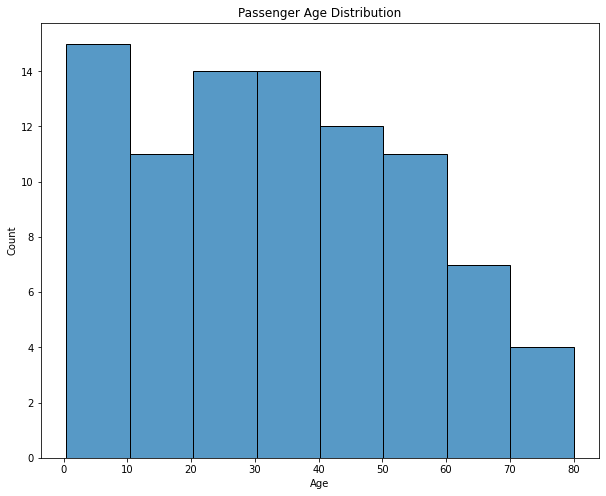

In [163]:
# visualize age distribution
df_age = train_data[['Age']].value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data=df_age, x='Age')

plt.title('Passenger Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Counts')

plt.show()

## Embarked

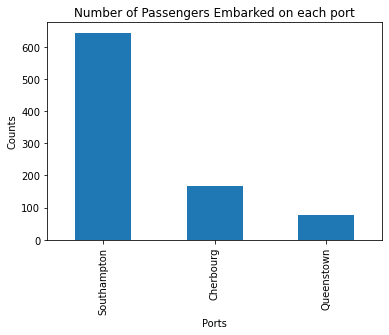

In [17]:
# visualize the number of passengers based on port of embarktion
PORTS = ['Southampton', 'Cherbourg', 'Queenstown']
df_port = train_data[['Embarked']].value_counts()
df_port.plot(kind='bar')

plt.title('Number of Passengers Embarked on each port')
plt.xlabel('Ports')
plt.ylabel('Counts')
plt.xticks(np.arange(3), PORTS)

plt.show()

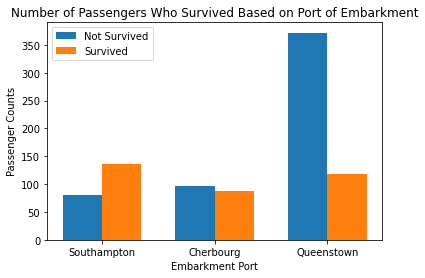

In [18]:
df_survived_port = train_data[['Embarked', 'Survived']].value_counts()
df_survived_port  = pd.pivot_table(df_survived_port.to_frame(), values=0, index=['Survived', 'Embarked'], aggfunc=np.sum)
df_survived_port  = df_survived_port.reset_index()
df_survived_port  = df_survived_port.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(PORTS))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Embarkment Port')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Port of Embarkment')
ax.set_xticks(x)
ax.set_xticklabels(PORTS)
ax.legend()

plt.show()

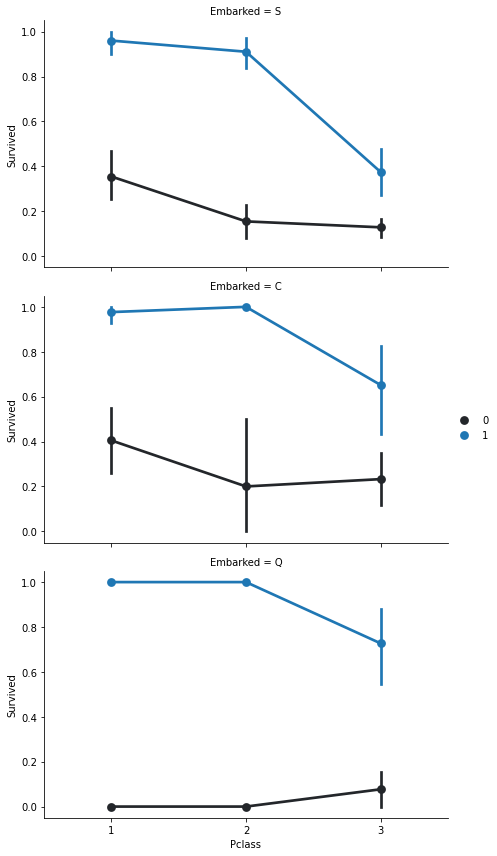

In [162]:
facet_grid = sns.FacetGrid(train_data, row='Embarked', height=4, aspect=1.6)
facet_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facet_grid.add_legend()

plt.show()

## Number of Siblings/Spouses (SibSp)

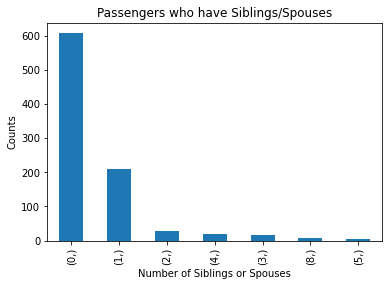

In [19]:
# visualize the number of passengers who have siblings or spouses
df_sibsp = train_data[['SibSp']].value_counts()
df_sibsp.plot(kind='bar')

plt.title('Passengers who have Siblings/Spouses')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Counts')

plt.show()

C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


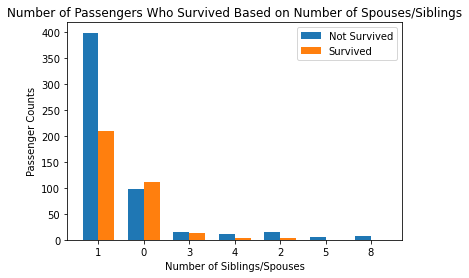

In [20]:
# visualize passengers who have siblings/spouses against survival rate
SIBSP = train_data.SibSp.unique()

df_survived_sibsp = train_data[['SibSp', 'Survived']].value_counts()
df_survived_sibsp = pd.pivot_table(df_survived_sibsp.to_frame(), values=0, index=['Survived', 'SibSp'], aggfunc=np.sum)
df_survived_sibsp = df_survived_sibsp.reset_index()
df_survived_sibsp = df_survived_sibsp.rename(columns={0: 'Counts'})

df_temp_sibsp = df_survived_sibsp[df_survived_sibsp['Survived'] == 0]
df_temp_sibsp2 = df_survived_sibsp[df_survived_sibsp['Survived'] == 1]

df_temp_sibsp.set_index('SibSp', inplace=True)
df_temp_sibsp2.set_index('SibSp', inplace=True)
df_temp_sibsp2.loc[5] = [1,0]
df_temp_sibsp2.loc[8] = [1,0]

# for i in range(len(df_temp_sibsp)):
#     df_temp_sibsp2.loc[i] = 0
    
# df_temp_sibsp2 = df_temp_sibsp2.sort_index()

# for i in range(7, len(df_temp_sibsp2)):
#     df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(SIBSP))

ax.bar(x - width/2, df_temp_sibsp['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_sibsp2['Counts'], width, label='Survived')

ax.set_xlabel('Number of Siblings/Spouses')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Spouses/Siblings')
ax.set_xticks(x)
ax.set_xticklabels(SIBSP)
ax.legend()

plt.show()

## Number of Parents/Children (Parch)

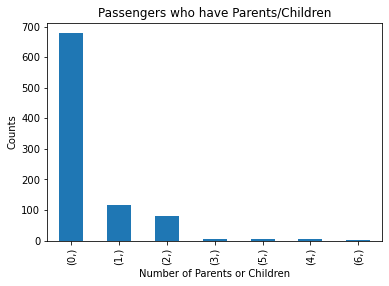

In [21]:
# visualize the number of passengers who have parents or children
df_parch = train_data[['Parch']].value_counts()
df_parch.plot(kind='bar')

plt.title('Passengers who have Parents/Children')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Counts')

plt.show()

C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


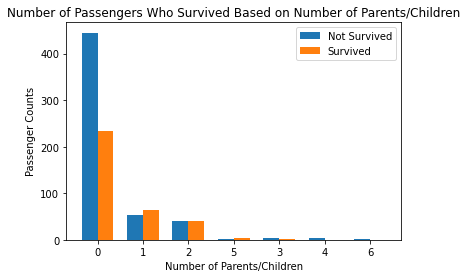

In [22]:
# visualize passengers who have parents/children against survival rate
PARCH = train_data.Parch.unique()

df_survived_parch = train_data[['Parch', 'Survived']].value_counts()
df_survived_parch = pd.pivot_table(df_survived_parch.to_frame(), values=0, index=['Survived', 'Parch'], aggfunc=np.sum)
df_survived_parch = df_survived_parch.reset_index()
df_survived_parch = df_survived_parch.rename(columns={0: 'Counts'})

df_temp_parch = df_survived_parch[df_survived_parch['Survived'] == 0]
df_temp_parch2 = df_survived_parch[df_survived_parch['Survived'] == 1]

df_temp_parch.set_index('Parch', inplace=True)
df_temp_parch2.set_index('Parch', inplace=True)
df_temp_parch2.loc[4] = [1,0]
df_temp_parch2.loc[6] = [1,0]

# for i in range(len(df_temp_sibsp)):
#     df_temp_sibsp2.loc[i] = 0
    
# df_temp_sibsp2 = df_temp_sibsp2.sort_index()

# for i in range(7, len(df_temp_sibsp2)):
#     df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(PARCH))

ax.bar(x - width/2, df_temp_parch['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_parch2['Counts'], width, label='Survived')

ax.set_xlabel('Number of Parents/Children')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Parents/Children')
ax.set_xticks(x)
ax.set_xticklabels(PARCH)
ax.legend()

plt.show()

## Fare

Text(0, 0.5, 'Counts')

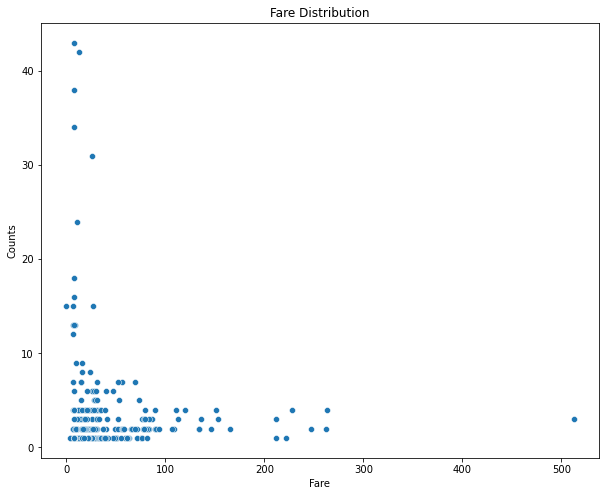

In [23]:
# visualize fare distribution
df_fare = train_data[['Fare']].value_counts()
df_fare = df_fare.reset_index()

plt.figure(figsize=(10,8))
plt.title('Fare Distribution')
sns.scatterplot(x=df_fare['Fare'], y=df_fare[0], data=df_fare)
plt.ylabel('Counts')

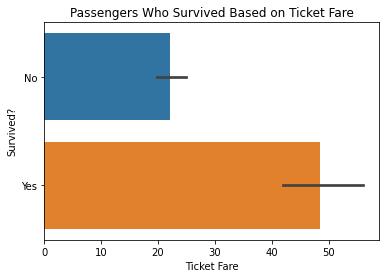

In [24]:
# visualize relattionship between fare against survival
SURVIVED = ['No', 'Yes']

df_survived_fare = train_data[['Fare', 'Survived']]
sns.barplot(x=df_survived_fare['Fare'], y=df_survived_fare['Survived'], data=df_survived_fare, orient='h')

plt.title('Passengers Who Survived Based on Ticket Fare')
plt.yticks(np.arange(2), SURVIVED)
plt.ylabel('Survived?')
plt.xlabel('Ticket Fare')

plt.show()

## Pearson Correlation

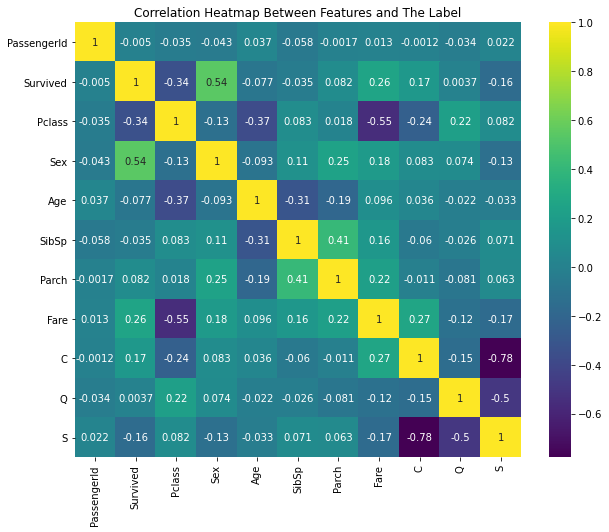

In [25]:
# pearson correlation against features and label
train_corr = train_data.corr()
plt.figure(figsize=(10,8))

sns.heatmap(train_corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap Between Features and The Label')

plt.show()

## Model Building

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [90]:
# build a prediction model
X = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']].to_numpy()
X_test = test_data[['Pclass', 'Sex', 'SibSp', 'Parch']].to_numpy()
X2 = train_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X_test2 = test_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X3 = train_data[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X_test3 = test_data[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()

y = train_data['Survived'].to_numpy()

model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)
model.fit(X3, y)
train_preds = model.predict(X3)
print('Training accuracy:', accuracy_score(y, train_preds))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X3, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validatiton accuracy:', (np.mean(n_scores)))

Training accuracy: 0.8204264870931538
Cross-validatiton accuracy: 0.8032043279234291


## Submission

In [43]:
test_preds = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_preds})
output.to_csv('titanic_embarked_one_hot_rf_submission.csv', index=False)
print("Submission saved!")

Submission saved!
